# Credit Loan

## 1. Load data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import inflection
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)
sns.set()

rcParams['figure.figsize'] = (18, 8)
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.spines.bottom'] = True
rcParams['axes.spines.left'] = True

COLORS = ['#99d594', '#D53E4F', '#FC8D59']

## 2.View Summary

In [2]:
import pandas as pd
df = pd.read_csv('loan_data.csv',index_col=0)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
loan = df.copy()

In [5]:
loan.shape

(466285, 74)

In [6]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [7]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01
delinq_2yrs,466256.0,2.846784e-01,7.973651e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01


#### 2.1  Checking duplicate id

In [8]:
loan.id.nunique()

466285

In [9]:
loan.member_id.nunique()

466285

- It can be seen that there are no duplicate `id` or `member_id` meaning that each row represents one individual.

#### 2.2 Drop columns

- Next, remove useless features. Examples include features that are unique IDs, in the form of free text, all values are empty (NULL), etc.

In [10]:
cols_to_drop = [
    # unique id
    'id'
    , 'member_id'
    
    # free text
    , 'url'
    , 'desc'
    
    # all null / constant / others
    , 'zip_code' 
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'
    
    # expert judgment
    , 'sub_grade'
]

In [11]:
loan1 = loan.drop(cols_to_drop, axis=1)

In [12]:
loan1.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
137565,10000,10000,10000.0,36 months,19.72,370.22,D,NaN,NaN,OWN,45000.0,Verified,May-13,Charged Off,n,credit_card,Credit Cards,MI,12.77,0.0,Mar-97,2.0,NaN,NaN,7.0,0.0,12933,94.4,10.0,f,0.00,0.00,2958.080000,2958.08,1742.84,1215.24,0.0,0.0,0.0,Jan-14,370.22,NaN,Feb-14,0.0,NaN,1,INDIVIDUAL,0.0,0.0,12933.0,13700.0
77826,18000,18000,18000.0,36 months,12.99,606.41,B,Supervisor,3 years,MORTGAGE,64000.0,Not Verified,Oct-13,Fully Paid,n,credit_card,Lending Club Loan,IL,14.79,0.0,Dec-77,2.0,NaN,96.0,14.0,1.0,9960,43.7,26.0,w,0.00,0.00,20186.290000,20186.29,17999.99,2186.30,0.0,0.0,0.0,Aug-15,251.68,NaN,Aug-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,18584.0,22800.0
14665,11200,11200,10950.0,36 months,10.99,366.63,B,Allstate Insurance,9 years,MORTGAGE,63000.0,Source Verified,May-11,Fully Paid,n,debt_consolidation,Debt relief,AL,22.42,0.0,Jul-00,0.0,77.0,NaN,9.0,0.0,14330,70.2,19.0,f,0.00,0.00,12980.460000,12690.62,11200.00,1780.46,0.0,0.0,0.0,Jul-13,4210.88,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
199717,6625,6625,6625.0,36 months,19.05,243.02,D,Core-Mark international,7 years,MORTGAGE,71000.0,Verified,Sep-12,Fully Paid,n,home_improvement,The remodel,TX,15.77,0.0,Oct-05,0.0,NaN,NaN,5.0,0.0,4896,97.9,9.0,f,0.00,0.00,8742.806989,8742.81,6625.00,2117.81,0.0,0.0,0.0,Sep-15,252.92,NaN,Dec-15,0.0,NaN,1,INDIVIDUAL,0.0,0.0,157965.0,5000.0
94469,11200,11200,11200.0,36 months,10.64,364.77,B,Cerner Corporation,3 years,RENT,74000.0,Source Verified,Sep-13,Current,n,debt_consolidation,Debt consolidation,MO,13.57,0.0,Aug-80,0.0,NaN,NaN,9.0,0.0,25766,71.6,20.0,f,2807.42,2807.42,10210.260000,10210.26,8392.58,1817.68,0.0,0.0,0.0,Jan-16,364.77,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,32050.0,36000.0


#### 2.3 Define Target variable / LabelingDefine Target variable / Labeling

- In project credit risk modeling, the main objective is to predict potential customers in terms of their ability to make payments on loans/credits that will be provided. The target variable must reflect the consumer's ability to make payments/consumers smoothly
- The `loan_status` feature is a feature that will be targeted because it reflects the performance of each consumer in making payments on loans/loans.

In [13]:
loan1.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

The `loan_status` feature has several values:
- `Current` means current payment; `Charged Off` means defaulted payment so it is written off; `Late` means late payment; `In Grace Period` means in a grace period; `Fully Paid` means payment paid off; `Default` means defaulted payment
- From these definitions, each individual can be marked whether they are a `bad loan` (bad borrower) or `good loan` (good borrower)
- The definitions of bad and good loans can sometimes be different depending on business needs. In this example, I'm using overdue payments of more than 30 days and worse as markers of bad loans.

In [14]:
bad_status = [
    'Charged Off' 
    , 'Default' 
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

loan1['bad_flag'] = np.where(loan1['loan_status'].isin(bad_status), 1, 0)

In [15]:
flag = loan1['bad_flag'].value_counts(normalize=True)*100
flag

0    89.069346
1    10.930654
Name: bad_flag, dtype: float64

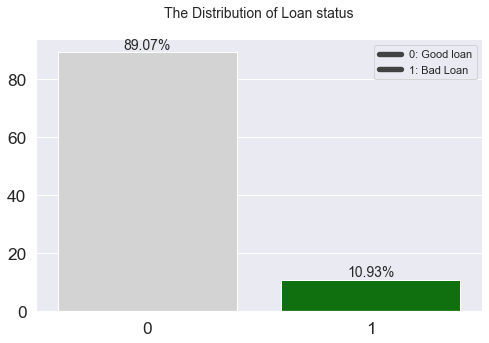

In [16]:
fig = plt.figure(figsize = (8,5))
color= ['lightgrey','Green']
ax = sns.barplot(x=flag.index, y=flag.values, palette= color)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '{:.2f}%'.format((100*p.get_height())/100), 
            ha="center", va="bottom", fontsize=14)
plt.legend(labels=["0: Good loan", "1: Bad Loan"])
plt.title('The Distribution of Loan status\n', fontsize=14)

plt.show()

the composition of good loans and bad loans is 89% : 10%, bad loans are much less, this can cause imbalanced dataset problems

#### 2.4 Drop column target

In [17]:
loan1.drop('loan_status', axis=1, inplace=True)

## 3. Cleaning and Preprocessing, Feature Engineering

- some features will be cleaned/modified for use in modeling

#### Emp_length

In [18]:
loan1['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [19]:
loan1['emp_length_int'] = loan1['emp_length'].str.replace('\+ years', '')
loan1['emp_length_int'] = loan1['emp_length_int'].str.replace('< 1 year', str(0))
loan1['emp_length_int'] = loan1['emp_length_int'].str.replace(' years', '')
loan1['emp_length_int'] = loan1['emp_length_int'].str.replace(' year', '')

C:\Users\Nia\AppData\Local\Temp/ipykernel_11280/222342317.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan1['emp_length_int'] = loan1['emp_length'].str.replace('\+ years', '')


In [20]:
loan1['emp_length_int'] = loan1['emp_length_int'].astype(float)

In [21]:
loan1.drop('emp_length', axis=1, inplace=True)

#### Term

In [22]:
loan1['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [23]:
loan1['term_int'] = loan1['term'].str.replace(' months', '')
loan1['term_int'] = loan1['term_int'].astype(float)

In [24]:
loan1.drop('term', axis=1, inplace=True)

#### Earliest_cr_line

`earliest_cr_line` ; the month of the credit line the borrower reported being opened the earliest,
will be changed to how much time. will use reference date = today. However, because the dataset ended in 2017, the reference for 2017 will be used, with 2017-12-01 as the reference date.

In [25]:
loan1['earliest_cr_line'].head(5)

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [26]:
loan1['earliest_cr_line_date'] = pd.to_datetime(loan1['earliest_cr_line'], format='%b-%y')
loan1['earliest_cr_line_date'].head(5)

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [27]:
loan1['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan1['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
loan1['mths_since_earliest_cr_line'].head(5)

0    395.0
1    224.0
2    193.0
3    262.0
4    263.0
Name: mths_since_earliest_cr_line, dtype: float64

In [28]:
loan1['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [29]:
loan1[loan1['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(5)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0


There is a negative value, due to an error in converting data. will be changed to the maximum value.

#### Issue_d

`issue_d` ; month it was funded by the borrower.

In [30]:
loan1['issue_d'].head(5)

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [31]:
loan1['issue_d_date'] = pd.to_datetime(loan1['issue_d'], format='%b-%y')
loan1['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan1['issue_d_date']) / np.timedelta64(1, 'M')))
loan1['mths_since_issue_d'].head(5)

0    72.0
1    72.0
2    72.0
3    72.0
4    72.0
Name: mths_since_issue_d, dtype: float64

In [32]:
loan1['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

In [33]:
loan1.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

#### last_pymnt_d

`last_pymnt_d` ; Last month payment was received

In [34]:
loan1['last_pymnt_d_date'] = pd.to_datetime(loan1['last_pymnt_d'], format='%b-%y')
loan1['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan1['last_pymnt_d_date']) / np.timedelta64(1, 'M')))
loan1['mths_since_last_pymnt_d'].head(5)

0    35.0
1    56.0
2    42.0
3    35.0
4    23.0
Name: mths_since_last_pymnt_d, dtype: float64

In [35]:
loan1['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         31.294369
std          12.809898
min          23.000000
25%          23.000000
50%          24.000000
75%          35.000000
max         120.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [36]:
loan1.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

#### next_pymnt_d

`next_pymnt_d` ; Next scheduled payment date

In [37]:
loan1['next_pymnt_d_date'] = pd.to_datetime(loan1['next_pymnt_d'], format='%b-%y')
loan1['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan1['next_pymnt_d_date']) / np.timedelta64(1, 'M')))
loan1['mths_since_next_pymnt_d'].head(5)

0     NaN
1     NaN
2     NaN
3     NaN
4    22.0
Name: mths_since_next_pymnt_d, dtype: float64

In [38]:
loan1['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.738136
std           6.082298
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         120.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [39]:
loan1.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

#### last_credit_pull_d

`last_credit_pull_d` ; 

In [40]:
loan1['last_credit_pull_d_date'] = pd.to_datetime(loan1['last_credit_pull_d'], format='%b-%y')
loan1['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan1['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))
loan1['mths_since_last_credit_pull_d'].head(5)

0    23.0
1    51.0
2    23.0
3    35.0
4    23.0
Name: mths_since_last_credit_pull_d, dtype: float64

In [41]:
loan1['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         27.045588
std           9.636423
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         127.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [42]:
loan1.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

In [43]:
loan1.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_title,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,bad_flag,emp_length_int,term_int,earliest_cr_line_date,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,5000,5000,4975.0,10.65,162.87,B,NaN,RENT,24000.0,Verified,n,credit_card,Computer,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,10.0,36.0,1985-01-01,395.0,72.0,35.0,NaN,23.0
1,2500,2500,2500.0,15.27,59.83,C,Ryder,RENT,30000.0,Source Verified,n,car,bike,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,1,0.0,60.0,1999-04-01,224.0,72.0,56.0,NaN,51.0
2,2400,2400,2400.0,15.96,84.33,C,NaN,RENT,12252.0,Not Verified,n,small_business,real estate business,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,10.0,36.0,2001-11-01,193.0,72.0,42.0,NaN,23.0
3,10000,10000,10000.0,13.49,339.31,C,AIR RESOURCES BOARD,RENT,49200.0,Source Verified,n,other,personel,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,10.0,36.0,1996-02-01,262.0,72.0,35.0,NaN,35.0
4,3000,3000,3000.0,12.69,67.79,B,University Medical Group,RENT,80000.0,Source Verified,n,other,Personal,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,1.0,60.0,1996-01-01,263.0,72.0,23.0,22.0,23.0


## 4. Explore Data Analyst

Doing Exploratory data analysis (EDA) to analyze and summarize data sets to understand their features, patterns, and relationships. This step identifies potential issues or problems with the data, such as missing values, outliers, or incorrect data types.

After cleaning the data, the dataset will be used to do the analysis process. In this process, I organized and formatted the data, performed some calculations, and identified trends.

### 4.1. Correlation

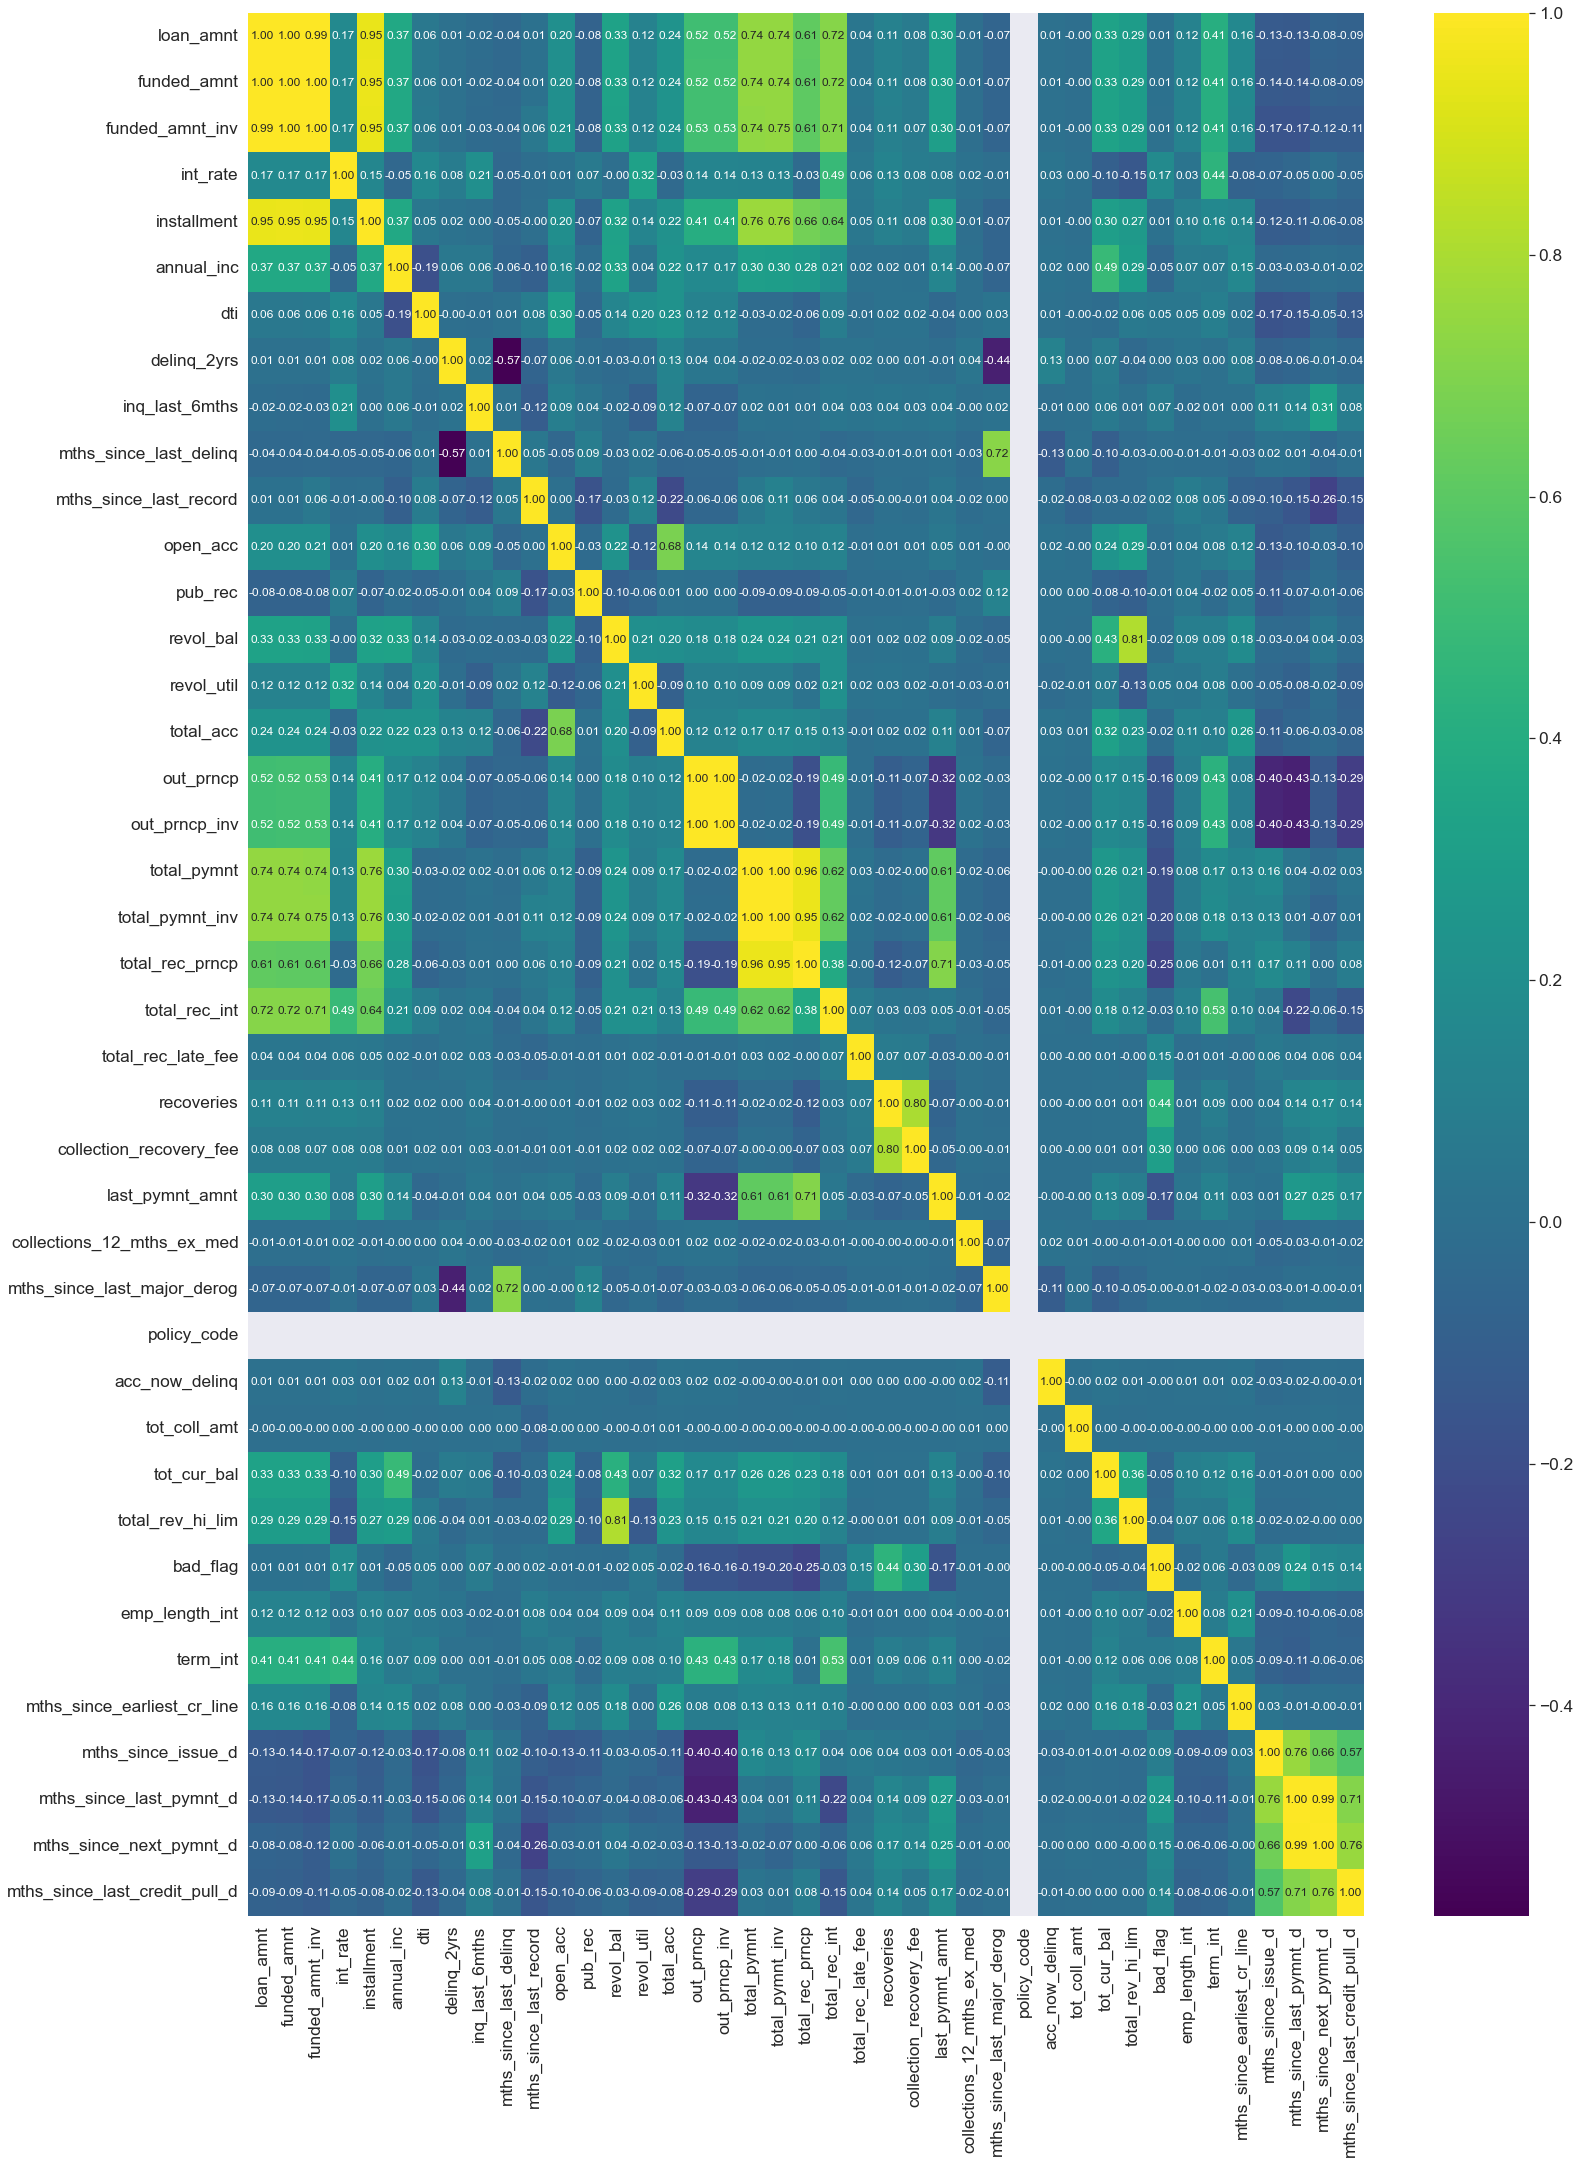

In [44]:
plt.figure(figsize=(25,35))
sns.heatmap(loan1.corr(), cmap='viridis', annot= True, fmt='.2f')
plt.show()

- Features that have a high correlation will be taken 1, with a value above 0.7

In [45]:
corr_matrix = loan1.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

C:\Users\Nia\AppData\Local\Temp/ipykernel_11280/95806856.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [46]:
to_drop_hicorr

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'mths_since_last_major_derog',
 'total_rev_hi_lim',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [47]:
loan1.drop(to_drop_hicorr, axis=1, inplace=True)

### 4.2 Categorical Feature

In [48]:
loan1.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63099
addr_state                 50
earliest_cr_line          664
initial_list_status         2
application_type            1
dtype: int64

- will remove features with a very high unique value (high cardinality) and features that only have one unique value.

In [49]:
loan1.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [50]:
loan1.select_dtypes(exclude='object').nunique()

loan_amnt                        1352
int_rate                          506
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
total_rec_late_fee               5808
recoveries                      22773
collections_12_mths_ex_med          9
policy_code                         1
acc_now_delinq                      6
tot_coll_amt                     6321
tot_cur_bal                    220690
bad_flag                            2
emp_length_int                     11
term_int                            2
earliest_cr_line_date             664
mths_since_earliest_cr_line       664
mths_since_i

in data other than objects there is 1 feature that only has 1 unique value, then that feature will be discarded.

In [51]:
loan1.drop(['policy_code'], axis=1, inplace=True)

In [52]:
for col in loan1.select_dtypes(include='object').columns.tolist():
    print(loan1[col].value_counts(normalize=True)*100)
    print('\n')

B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: grade, dtype: float64


MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: home_ownership, dtype: float64


Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: verification_status, dtype: float64


n    99.99807
y     0.00193
Name: pymnt_plan, dtype: float64


debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64


CA    15.323247
NY  

- Features that are dominated by only one value will be discarded

In [53]:
loan1.drop('pymnt_plan', axis=1, inplace=True)

### 4.4 Mising value

#### 4.4.1 Checking Mising value

In [54]:
check_missing = loan1.isnull().sum() * 100 / loan1.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record         86.566585
mths_since_last_delinq         53.690554
tot_cur_bal                    15.071469
tot_coll_amt                   15.071469
emp_length_int                  4.505399
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
earliest_cr_line_date           0.006219
acc_now_delinq                  0.006219
mths_since_earliest_cr_line     0.006219
total_acc                       0.006219
delinq_2yrs                     0.006219
pub_rec                         0.006219
open_acc                        0.006219
inq_last_6mths                  0.006219
earliest_cr_line                0.006219
annual_inc                      0.000858
dtype: float64

- missing value above 75%, the feature will be removed

In [55]:
loan1.drop('mths_since_last_record', axis=1, inplace=True)

#### 4.4.2 Mising value Filling

In [56]:
loan1.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.00,12000.00,20000.00,35000.00
int_rate,466285.0,13.829236,4.357587,5.42,10.99,13.66,16.49,26.06
annual_inc,466281.0,73277.381470,54963.568654,1896.00,45000.00,63000.00,88960.00,7500000.00
dti,466285.0,17.218758,7.851121,0.00,11.36,16.87,22.78,39.99
delinq_2yrs,466256.0,0.284678,0.797365,0.00,0.00,0.00,0.00,29.00
inq_last_6mths,466256.0,0.804745,1.091598,0.00,0.00,0.00,1.00,33.00
mths_since_last_delinq,215934.0,34.104430,21.778487,0.00,16.00,31.00,49.00,188.00
open_acc,466256.0,11.187069,4.987526,0.00,8.00,10.00,14.00,84.00
pub_rec,466256.0,0.160564,0.510863,0.00,0.00,0.00,0.00,63.00
revol_bal,466285.0,16230.203487,20676.245152,0.00,6413.00,11764.00,20333.00,2568995.00


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='total_acc', ylabel='Density'>

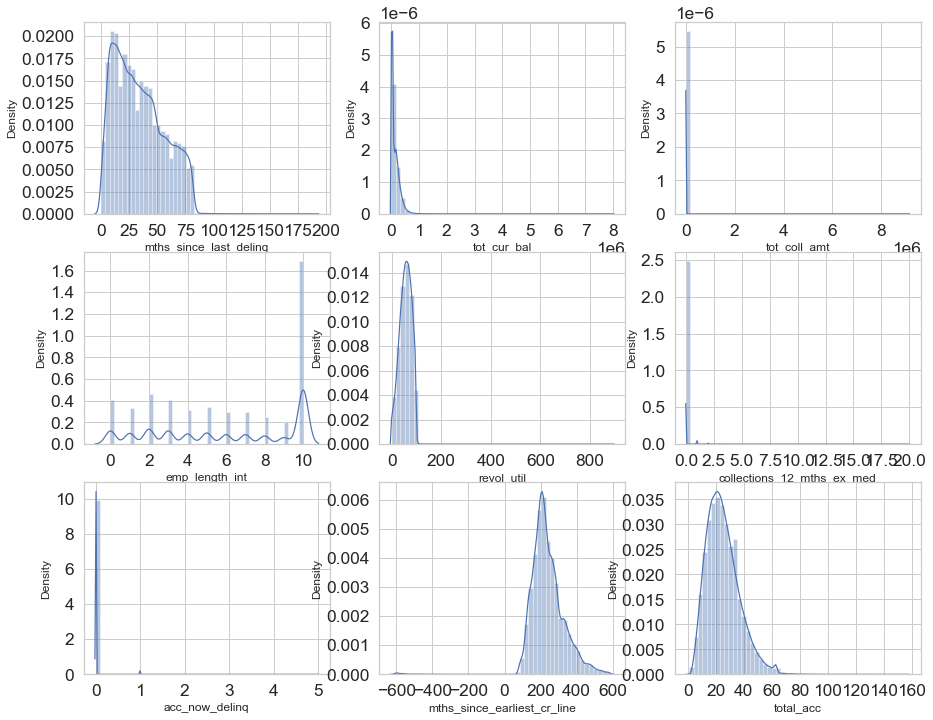

In [57]:
# distribution of numerical features that have missing values pt.1
sns.set_style('whitegrid')
fig, ax = plt.subplots(3,3, figsize=(15,12))
sns.set_context('paper', font_scale=1)

sns.distplot(loan1['mths_since_last_delinq'], ax=ax[0][0])

sns.distplot(loan1['tot_cur_bal'], ax=ax[0][1])

sns.distplot(loan1['tot_coll_amt'], ax=ax[0][2])

sns.distplot(loan1['emp_length_int'], ax=ax[1][0])

sns.distplot(loan1['revol_util'], ax=ax[1][1])

sns.distplot(loan1['collections_12_mths_ex_med'], ax=ax[1][2])

sns.distplot(loan1['acc_now_delinq'], ax=ax[2][0])

sns.distplot(loan1['mths_since_earliest_cr_line'], ax=ax[2][1])

sns.distplot(loan1['total_acc'], ax=ax[2][2])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

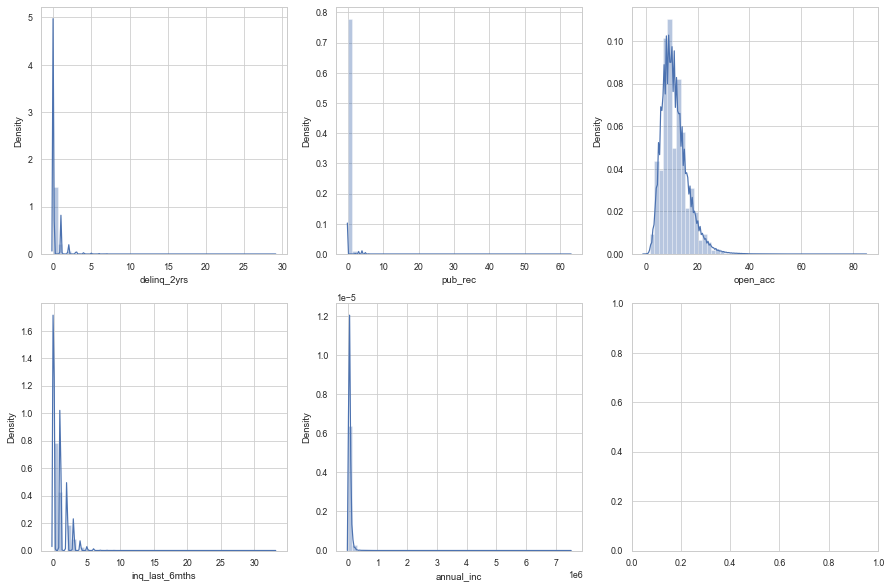

In [58]:
# distribution of numerical features that have missing values pt.2
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,3, figsize=(15,10))
sns.set_context('paper', font_scale=1)

sns.distplot(loan1['delinq_2yrs'], ax=ax[0][0])

sns.distplot(loan1['pub_rec'], ax=ax[0][1])

sns.distplot(loan1['open_acc'], ax=ax[0][2])

sns.distplot(loan1['inq_last_6mths'], ax=ax[1][0])

sns.distplot(loan1['annual_inc'], ax=ax[1][1])

In [59]:
loan1['annual_inc'].fillna(loan1['annual_inc'].mean(), inplace=True)
loan1['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan1['acc_now_delinq'].fillna(0, inplace=True)
loan1['total_acc'].fillna(0, inplace=True)
loan1['pub_rec'].fillna(0, inplace=True)
loan1['open_acc'].fillna(0, inplace=True)
loan1['inq_last_6mths'].fillna(0, inplace=True)
loan1['delinq_2yrs'].fillna(0, inplace=True)
loan1['collections_12_mths_ex_med'].fillna(0, inplace=True)
loan1['revol_util'].fillna(0, inplace=True)
loan1['emp_length_int'].fillna(0, inplace=True)
loan1['tot_cur_bal'].fillna(0, inplace=True)
loan1['tot_coll_amt'].fillna(0, inplace=True)
loan1['mths_since_last_delinq'].fillna(-1, inplace=True)

In [60]:
loan1.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.0,14317.277577,8286.509164,500.00,8000.00,12000.00,20000.00,35000.00
int_rate,466285.0,13.829236,4.357587,5.42,10.99,13.66,16.49,26.06
annual_inc,466285.0,73277.381470,54963.332902,1896.00,45000.00,63000.00,88953.00,7500000.00
dti,466285.0,17.218758,7.851121,0.00,11.36,16.87,22.78,39.99
delinq_2yrs,466285.0,0.284661,0.797343,0.00,0.00,0.00,0.00,29.00
inq_last_6mths,466285.0,0.804695,1.091583,0.00,0.00,0.00,1.00,33.00
mths_since_last_delinq,466285.0,15.256667,22.935753,-1.00,-1.00,-1.00,28.00,188.00
open_acc,466285.0,11.186373,4.988151,0.00,8.00,10.00,14.00,84.00
pub_rec,466285.0,0.160554,0.510848,0.00,0.00,0.00,0.00,63.00
revol_bal,466285.0,16230.203487,20676.245152,0.00,6413.00,11764.00,20333.00,2568995.00


#### 4.4.3 Detecting Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

<AxesSubplot:xlabel='total_acc'>

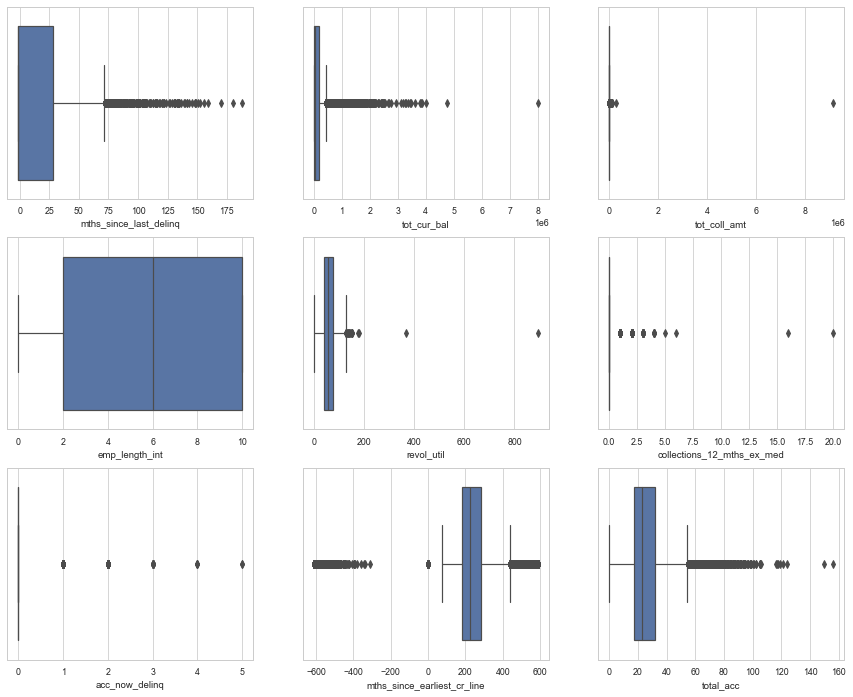

In [61]:
# Boxplot of numerical features that have outliers pt.1
sns.set_style('whitegrid')
fig, ax = plt.subplots(3,3, figsize=(15,12))
sns.set_context('paper', font_scale=1)

sns.boxplot(loan1['mths_since_last_delinq'], ax=ax[0][0])

sns.boxplot(loan1['tot_cur_bal'], ax=ax[0][1])

sns.boxplot(loan1['tot_coll_amt'], ax=ax[0][2])

sns.boxplot(loan1['emp_length_int'], ax=ax[1][0])

sns.boxplot(loan1['revol_util'], ax=ax[1][1])

sns.boxplot(loan1['collections_12_mths_ex_med'], ax=ax[1][2])

sns.boxplot(loan1['acc_now_delinq'], ax=ax[2][0])

sns.boxplot(loan1['mths_since_earliest_cr_line'], ax=ax[2][1])

sns.boxplot(loan1['total_acc'], ax=ax[2][2])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\si

<AxesSubplot:xlabel='annual_inc'>

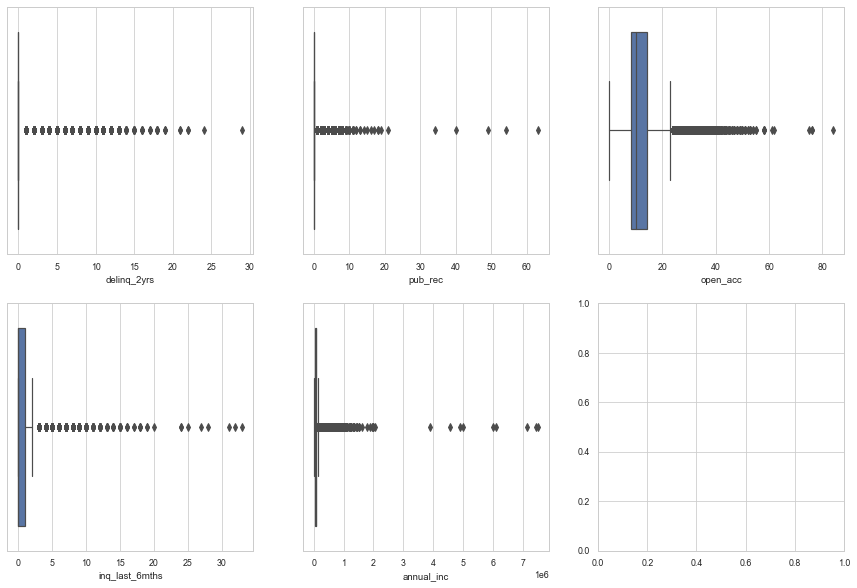

In [62]:
# distribution of numerical features that have missing values pt.2
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,3, figsize=(15,10))
sns.set_context('paper', font_scale=1)

sns.boxplot(loan1['delinq_2yrs'], ax=ax[0][0])

sns.boxplot(loan1['pub_rec'], ax=ax[0][1])

sns.boxplot(loan1['open_acc'], ax=ax[0][2])

sns.boxplot(loan1['inq_last_6mths'], ax=ax[1][0])

sns.boxplot(loan1['annual_inc'], ax=ax[1][1])

Outliers on the numerical features mentioned above will not be removed because there may be insights that can be drawn from these outliers.

## 5. Feature Scaling and Transformation

### 5.1 One Hot Encoding

- All categorical do One Hot Encoding

In [63]:
categorical_cols = [col for col in loan1.select_dtypes(include='object').columns.tolist()]

In [64]:
onehot = pd.get_dummies(loan1[categorical_cols], drop_first=True)

In [65]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,earliest_cr_line_Apr-01,earliest_cr_line_Apr-02,earliest_cr_line_Apr-03,earliest_cr_line_Apr-04,earliest_cr_line_Apr-05,earliest_cr_line_Apr-06,earliest_cr_line_Apr-07,earliest_cr_line_Apr-08,earliest_cr_line_Apr-09,earliest_cr_line_Apr-10,earliest_cr_line_Apr-11,earliest_cr_line_Apr-55,earliest_cr_line_Apr-61,earliest_cr_line_Apr-62,earliest_cr_line_Apr-63,earliest_cr_line_Apr-64,earliest_cr_line_Apr-65,earliest_cr_line_Apr-66,earliest_cr_line_Apr-67,earliest_cr_line_Apr-68,earliest_cr_line_Apr-69,earliest_cr_line_Apr-70,earliest_cr_line_Apr-71,earliest_cr_line_Apr-72,earliest_cr_line_Apr-73,earliest_cr_line_Apr-74,earliest_cr_line_Apr-75,earliest_cr_line_Apr-76,earliest_cr_line_Apr-77,earliest_cr_line_Apr-78,earliest_cr_line_Apr-79,earliest_cr_line_Apr-80,earliest_cr_line_Apr-81,earliest_cr_line_Apr-82,earliest_cr_line_Apr-83,earliest_cr_line_Apr-84,earliest_cr_line_Apr-85,earliest_cr_line_Apr-86,earliest_cr_line_Apr-87,earliest_cr_line_Apr-88,earliest_cr_line_Apr-89,earliest_cr_line_Apr-90,earliest_cr_line_Apr-91,earliest_cr_line_Apr-92,earliest_cr_line_Apr-93,earliest_cr_line_Apr-94,earliest_cr_line_Apr-95,earliest_cr_line_Apr-96,earliest_cr_line_Apr-97,earliest_cr_line_Apr-98,earliest_cr_line_Apr-99,earliest_cr_line_Aug-00,earliest_cr_line_Aug-01,earliest_cr_line_Aug-02,earliest_cr_line_Aug-03,earliest_cr_line_Aug-04,earliest_cr_line_Aug-05,earliest_cr_line_Aug-06,earliest_cr_line_Aug-07,earliest_cr_line_Aug-08,earliest_cr_line_Aug-09,earliest_cr_line_Aug-10,earliest_cr_line_Aug-11,earliest_cr_line_Aug-46,earliest_cr_line_Aug-58,earliest_cr_line_Aug-60,earliest_cr_line_Aug-61,earliest_cr_line_Aug-62,earliest_cr_line_Aug-63,earliest_cr_line_Aug-64,earliest_cr_line_Aug-65,earliest_cr_line_Aug-66,earliest_cr_line_Aug-67,earliest_cr_line_Aug-68,earliest_cr_line_Aug-69,earliest_cr_line_Aug-70,earliest_cr_line_Aug-71,earliest_cr_line_Aug-72,earliest_cr_line_Aug-73,earliest_cr_line_Aug-74,earliest_cr_line_Aug-75,earliest_cr_line_Aug-76,earliest_cr_line_Aug-77,earliest_cr_line_Aug-78,earliest_cr_line_Aug-79,earliest_cr_line_Aug-80,earliest_cr_line_Aug-81,earliest_cr_line_Aug-82,earliest_cr_line_Aug-83,earliest_cr_line_Aug-84,earliest_cr_line_Aug-85,earliest_cr_line_Aug-86,earliest_cr_line_Aug-87,earliest_cr_line_Aug-88,earliest_cr_line_Aug-89,earliest_cr_line_Aug-90,earliest_cr_line_Aug-91,earliest_cr_line_Aug-92,earliest_cr_line_Aug-93,earliest_cr_line_Aug-94,earliest_cr_line_Aug-95,earliest_cr_line_Aug-96,earliest_cr_line_Aug-97,earliest_cr_line_Aug-98,earliest_cr_line_Aug-99,earliest_cr_line_Dec-00,earliest_cr_line_Dec-01,earliest_cr_line_Dec-02,earliest_cr_line_Dec-03,earliest_cr_line_Dec-04,earliest_cr_line_Dec-05,earliest_cr_line_Dec-06,earliest_cr_line_Dec-07,earliest_cr_line_Dec-08,earliest_cr_line_Dec-09,earliest_cr_line_Dec-10,earliest_cr_line_Dec-50,earliest_cr_line_Dec-51,earliest_

### 5.2 Standarization

- All numerical columns are standardized using StandardScaler.

In [66]:
numerical_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs','inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp','total_rec_late_fee', 'recoveries', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'emp_length_int','term_int', 'mths_since_earliest_cr_line', 'mths_since_issue_d']

In [67]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(loan1[numerical_cols]), columns=numerical_cols)

In [68]:
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,1.654763,1.446626
1,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,-1.523744,1.622784,-0.164564,1.446626
2,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,-0.494384,1.446626
3,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,0.239731,1.446626
4,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-1.257509,1.622784,0.250370,1.446626


### 5.3 Transformed Dataframe

- Recombine the transformed columns

### Save the clean dataset

In [69]:
data_model = pd.concat([onehot, std, loan1[['bad_flag']]], axis=1)

## 6. Modeling

**Random Forest Algorithm**

* Use the weighted random forest algorithm to classify the financial credit risk data and construct the evaluation index system. 
* To predict loan eligibility using machine learning models, we can build a predictive model to predict if an applicant is able to repay the lending company or not.

### 6.1 Train-Test Split

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
X_train.shape, X_test.shape

((373028, 762), (93257, 762))

### 6.2 Training

- Random Forest algorithm will be used for modeling.

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

Feature Importance can be displayed.

In [75]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
753,recoveries,0.333395
751,out_prncp,0.184710
752,total_rec_late_fee,0.075964
740,int_rate,0.051194
761,mths_since_issue_d,0.036119
...,...,...
86,earliest_cr_line_Apr-55,0.000000
365,earliest_cr_line_Jul-60,0.000000
364,earliest_cr_line_Jul-59,0.000000
363,earliest_cr_line_Jul-58,0.000000


## 7. Evaluate Model Performance

* AUC (Area Under the Curve) and KS (Kolmogorov-Smirnov) are two common methods to evaluate model performance. AUC-ROC is used to measure machine learning model performance for binary classification problems
* The ROC AUC score goes from 0.5 to 1.0, while KS statistics range from 0.0 to 1.0. K-S or Kolmogorov-Smirnov chart measures the performance of classification models by measuring the degree of separation between the cumulative percentage of responders or 1's (cumulative true positive rate) and non-responders or 0's (cumulative false positive rate). Accuracy is one of the simplest ways to measure model performance.

To measure model performance, two metrics commonly used in the world of credit risk are AUC and KS.

In [76]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

### 7.1 AUC 

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score

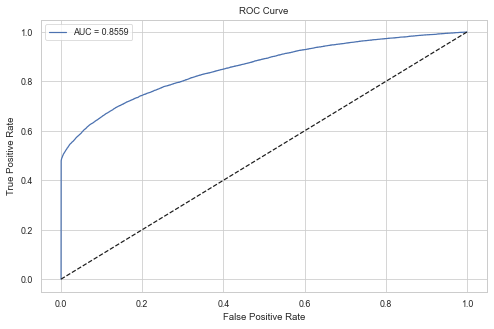

In [78]:
plt.figure(figsize=(8,5))
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

### 7.2 KS (Kolmogorov-Smirnov)

In [79]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [80]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,334474,0,0.063340,1,0,1,0.000011,0.0,0.000012
1,294078,0,0.063866,2,0,2,0.000021,0.0,0.000024
2,321938,0,0.063942,3,0,3,0.000032,0.0,0.000036
3,458381,0,0.064037,4,0,4,0.000043,0.0,0.000048
4,346851,0,0.064040,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5595')

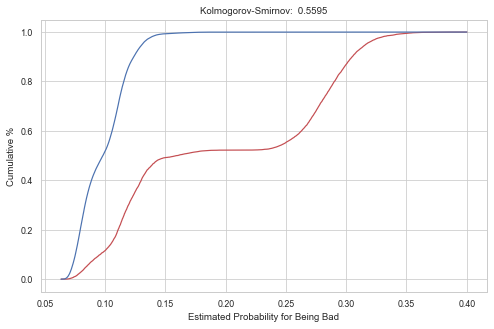

In [81]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])
plt.figure(figsize=(8,5))
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

The built model produces performance `AUC = 0.857` and `KS = 0.56`. In credit risk modeling, generally AUC above 0.7 and KS above 0.3 is a good performance.